<div style='float:left'>
<img style="-webkit-user-select: none" src="https://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/marca_UOC_web.jpg">
<h1>
B2.332-A7 Stacking.R_Stacked
</h1>

## Descripción:

### En este ejemplo se muestra como generar un clasificador arbol de decisión y como mejorarlo con la técnica de Stacking

## Procedimiento:

### Instalar los packages necesarios en caso de no haberlo hecho anteriormente

In [1]:
if(!require(rpart)){
    install.packages('rpart',repos='http://cran.es.r-project.org')
    require(rpart)
}
if(!require(caret)){
    install.packages('caret',repos='http://cran.es.r-project.org')
    require(caret)
}
if(!require(randomForest)){
    install.packages('randomForest',repos='http://cran.es.r-project.org')
    require(ramdomForest)
}
if(!require(caretEnsemble)){
    install.packages('caretEnsemble',repos='http://cran.es.r-project.org')
    require(caretEnsemble)
}
if(!require(C50)){
    install.packages('C50',repos='http://cran.es.r-project.org')
    require(C50)
}
if(!require(plyr)){
    install.packages('plyr',repos='http://cran.es.r-project.org')
    require(plyr)
}
if(!require(kernlab)){
    install.packages('kernlab',repos='http://cran.es.r-project.org')
    require(kernlab)
}
if(!require(nnet)){
    install.packages('nnet',repos='http://cran.es.r-project.org')
    require(nnet)
}
set.seed(17)

Loading required package: rpart
Loading required package: caret
Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.3.3"Loading required package: randomForest
randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin

Loading required package: caretEnsemble
Warning message:
"package 'caretEnsemble' was built under R version 3.3.3"
Attaching package: 'caretEnsemble'

The following object is masked from 'package:ggplot2':

    autoplot

Loading required package: C50
Loading required package: plyr
Loading required package: kernlab

Attaching package: 'kernlab'

The following object is masked from 'package:ggplot2':

    alpha

Loading required package: nnet


### Carga de los datos. 

In [2]:
wdbc=read.table(  url("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"), 
                  sep=",", header=FALSE)
dim(wdbc)
dataset <- wdbc[,(2:32)]

[1] 569  32

### Parámetros de nivel 0

In [3]:
# Metrica de calidad % instancias correctas sobre total
metric <- "Accuracy"
# Val. cruzada 
control <- trainControl(method="repeatedcv", number=10, repeats=3,savePredictions="all",classProbs=TRUE)
#algoritmos N0
algorithmList <- c('nnet', 'rpart', 'C5.0', 'knn', 'svmRadial')

### Creamos nivel 0

In [4]:
models <- caretList(V2~., data=dataset, trControl=control, metric=metric, methodList=algorithmList)

Warning message in trControlCheck(x = trControl, y = target):
"indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes."

# weights:  33
initial  value 339.451728 
final  value 338.205383 
converged
# weights:  97
initial  value 387.180877 
final  value 338.205383 
converged
# weights:  161
initial  value 322.076657 
iter  10 value 215.131197
iter  20 value 194.436866
iter  30 value 192.741227
iter  40 value 192.735794
iter  50 value 192.735500
final  value 192.735489 
converged
# weights:  33
initial  value 340.675188 
iter  10 value 242.856667
iter  20 value 119.590707
iter  30 value 73.007898
iter  40 value 57.874623
iter  50 value 55.188404
iter  60 value 55.176409
iter  70 value 54.947877
iter  80 value 54.068671
iter  90 value 53.792791
final  value 53.792789 
converged
# weights:  97
initial  value 463.746561 
iter  10 value 338.045228
iter  20 value 328.658505
iter  30 value 204.373209
iter  40 value 159.373537
iter  50 value 148.551226
iter  60 value 137.034211
iter  70 value 110.738072
iter  80 value 85.073696
iter  90 value 60.180263
iter 100 value 47.680232
final  value 47.680232 
stopped afte

###  Mostramos todas sus características.

$nnet
Neural Network 

569 samples
 30 predictor
  2 classes: 'B', 'M' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 512, 511, 512, 512, 513, 512, ... 
Resampling results across tuning parameters:

  size  decay  Accuracy   Kappa     
  1     0e+00  0.6379487  0.03057385
  1     1e-04  0.6486525  0.05907407
  1     1e-01  0.8470796  0.60468323
  3     0e+00  0.6701063  0.12545449
  3     1e-04  0.6802106  0.14697998
  3     1e-01  0.9289535  0.83366137
  5     0e+00  0.7392285  0.31835325
  5     1e-04  0.7080885  0.22469492
  5     1e-01  0.9420271  0.87561515

Accuracy was used to select the optimal model using  the largest value.
The final values used for the model were size = 5 and decay = 0.1. 

$rpart
CART 

569 samples
 30 predictor
  2 classes: 'B', 'M' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 512, 511, 512, 512, 513, 512, ... 
Resampling results across tuning pa


Call:
summary.resamples(object = results.N0)

Models: nnet, rpart, C5.0, knn, svmRadial 
Number of resamples: 30 

Accuracy 
            Min. 1st Qu. Median   Mean 3rd Qu.   Max. NA's
nnet      0.8772  0.9289 0.9387 0.9420  0.9649 1.0000    0
rpart     0.8571  0.9123 0.9298 0.9284  0.9474 1.0000    0
C5.0      0.8929  0.9474 0.9649 0.9636  0.9825 1.0000    0
knn       0.8929  0.9175 0.9298 0.9320  0.9474 0.9825    0
svmRadial 0.9298  0.9518 0.9823 0.9707  0.9825 1.0000    0

Kappa 
            Min. 1st Qu. Median   Mean 3rd Qu.   Max. NA's
nnet      0.7486  0.8480 0.8692 0.8756  0.9231 1.0000    0
rpart     0.6832  0.8143 0.8501 0.8464  0.8875 1.0000    0
C5.0      0.7624  0.8880 0.9234 0.9216  0.9622 1.0000    0
knn       0.7624  0.8246 0.8498 0.8532  0.8857 0.9619    0
svmRadial 0.8492  0.8984 0.9619 0.9377  0.9631 1.0000    0


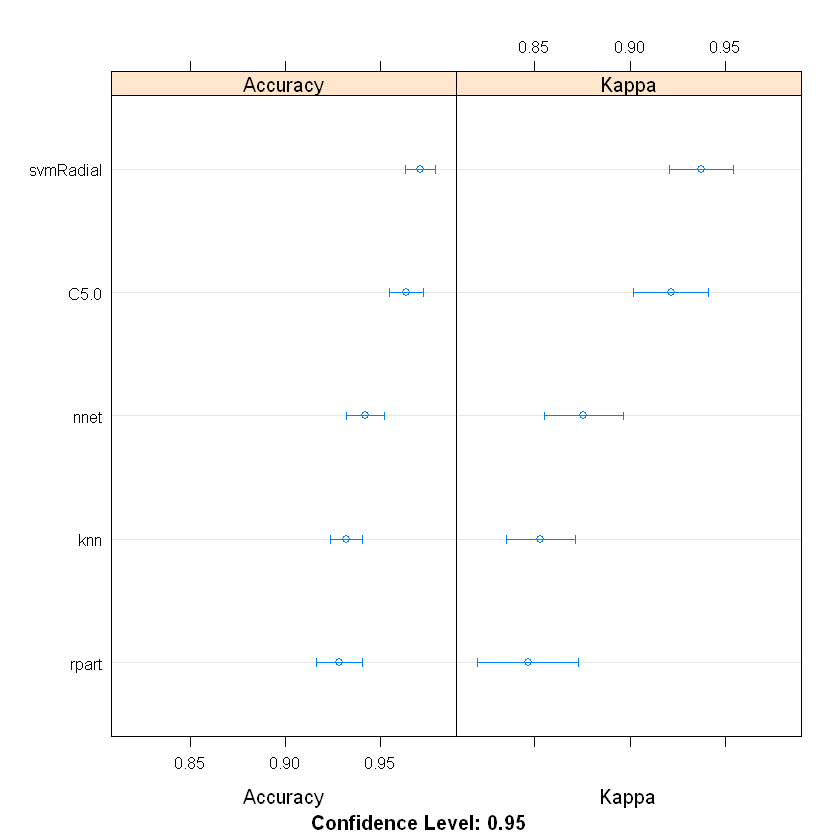

In [5]:
models
results.N0 <- resamples(models)
summary(results.N0)
dotplot(results.N0)

### Revisión de correlacion entre los diferentes modelos

,nnet,rpart,C5.0,knn,svmRadial
nnet,1.00000000,0.1892052,0.1995781,0.1911991,0.09531454
rpart,0.18920515,1.0000000,0.3708069,0.2074766,0.26447413
C5.0,0.19957811,0.3708069,1.0000000,0.2371958,0.55691361
knn,0.19119914,0.2074766,0.2371958,1.0000000,0.12981834
svmRadial,0.09531454,0.2644741,0.5569136,0.1298183,1.00000000


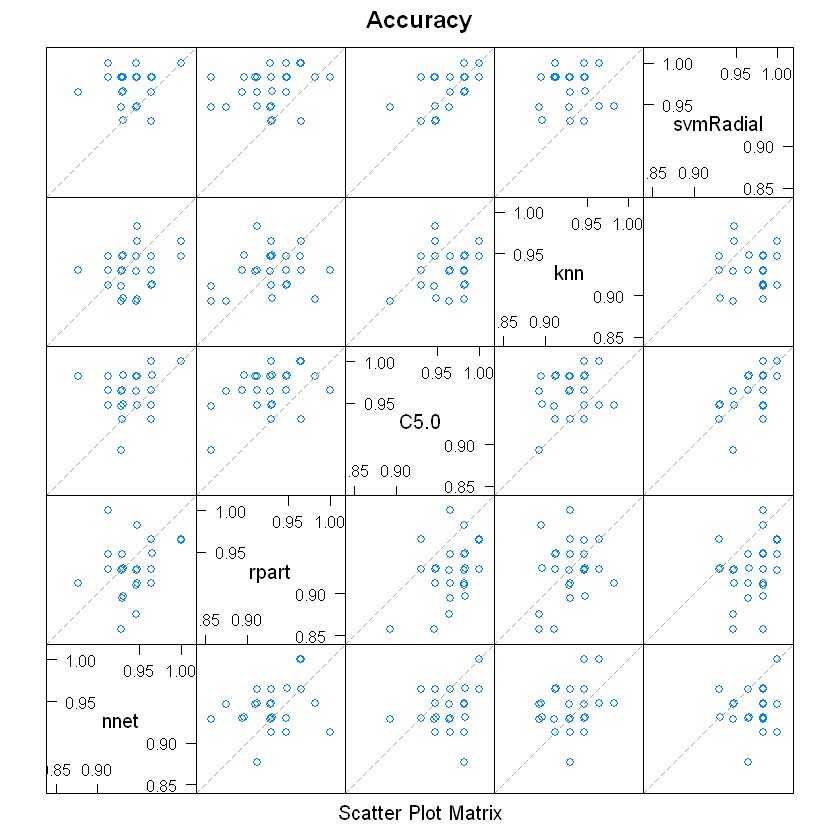

In [6]:
modelCor(results.N0)
splom(results.N0)

### Construcción del modelo final

### Parámetros de construcción

In [8]:
stackControl <- trainControl(method="repeatedcv", number=10, repeats=3, savePredictions=TRUE, classProbs=TRUE)

### Creación del modelo

In [10]:
N1.rf <- caretStack(models, method="rf", metric="Accuracy", trControl=stackControl)

###  Mostramos sus características.

In [11]:
print(N1.rf)

A rf ensemble of 2 base models: nnet, rpart, C5.0, knn, svmRadial

Ensemble results:
Random Forest 

1707 samples
   5 predictor
   2 classes: 'B', 'M' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 1537, 1537, 1536, 1535, 1536, 1536, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.9824160  0.9622048
  3     0.9820261  0.9613257
  5     0.9814436  0.9601616

Accuracy was used to select the optimal model using  the largest value.
The final value used for the model was mtry = 2. 
